<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/classification/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe==0.10.8
!pip install mediapipe opencv-python
!pip install numpy matplotlib scikit-learn
!pip install imageio
!pip install numpy matplotlib
!pip install colormath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39407 sha256=53223b17ecc8668abbf2ea43c3931eeba7caa4fb4dfb24cae72c3354562c66b6
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


<ipython-input-58-db2150b54ac0>:104: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


=============================전체 클러스터 중심값=============================
Cluster 1 Center (RGB): [190.5364204  150.91623309 140.61576483]
Cluster 2 Center (RGB): [243.92448836 211.00578687 204.6283698 ]
Cluster 3 Center (RGB): [49.99626168 38.31682243 35.93551402]
Cluster 4 Center (RGB): [136.24030274 100.46215705  94.18684957]
Cluster 5 Center (RGB): [211.38439743 173.48734416 163.10238005]
Cluster 6 Center (RGB): [229.13406873 192.90029699 183.179324  ]
Cluster 7 Center (RGB): [167.68509091 127.36254545 117.00763636]
Cluster 8 Center (RGB): [96.18560916 69.70891251 65.06132461]
=============================전체 클러스터 픽셀수=============================
Cluster 6 Size: 7055 pixels
Cluster 5 Size: 5306 pixels
Cluster 1 Size: 3838 pixels
Cluster 2 Size: 7076 pixels
Cluster 7 Size: 2763 pixels
Cluster 4 Size: 2117 pixels
Cluster 8 Size: 1226 pixels
Cluster 3 Size: 1070 pixels
전체 픽셀 수: 30451


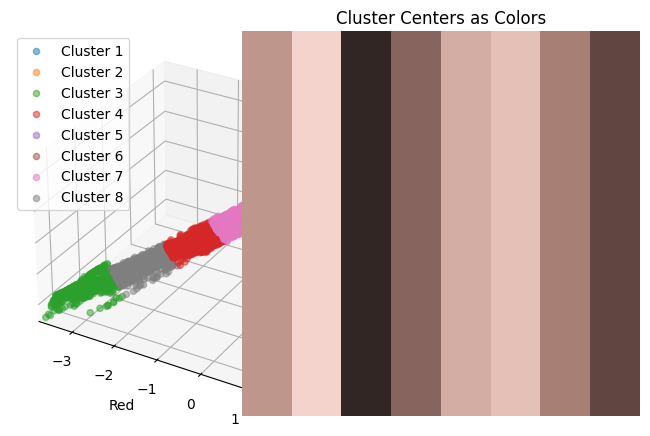

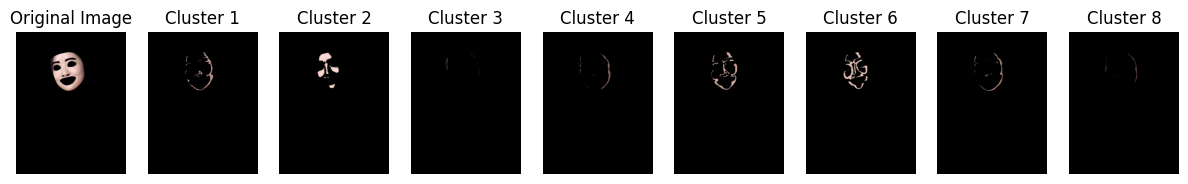

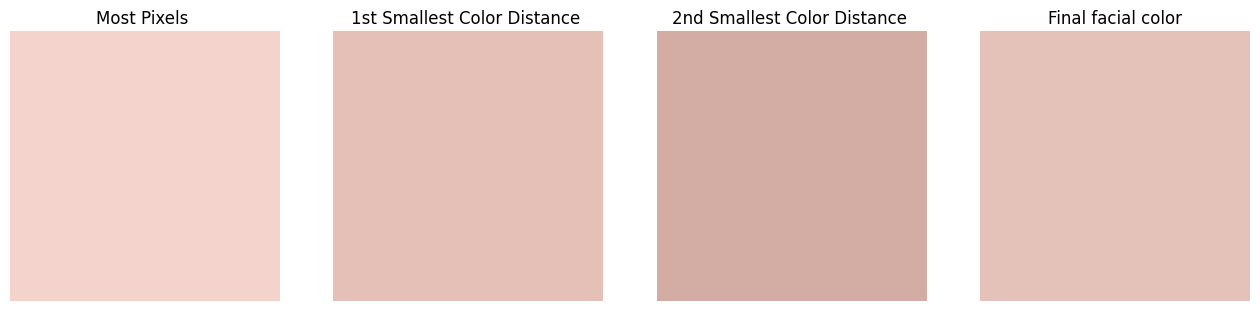

=============================변환=============================
평균 RGB 값: [229.70911149 194.23357514 185.55039358]
보정 RGB 값: (198.7091114883984, 163.23357514019654, 156.55039357925605)
Lab: L=70.03551688775963, a=11.984694718380817, b=8.366283565757037
HSV: H=9.511458449012082, S=0.2121629833345804, V=77.93
Summer cool light
Winter cool bright


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh



# 이미지 파일의 경우를 사용하세요.
IMAGE_FILES = ["/content/다운로드 (28).jpeg"]

with mp.solutions.face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # 작업 전에 BGR 이미지를 RGB로 변환합니다.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # 이미지에 출력하고 그 위에 얼굴 그물망 경계점을 그립니다.
        if not results.multi_face_landmarks:
            continue

        annotated_image = image.copy()

        for face_landmarks in results.multi_face_landmarks:
            # 얼굴 전체에 대한 랜드마크 그리기
            for landmark in face_landmarks.landmark:
                x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                #cv2.circle(annotated_image, (x, y), 1, (0, 255, 0), 1)

            # 얼굴의 왼쪽 눈과 오른쪽 눈을 검정색으로 채우기

            # eye indices
            left_eye = [243, 190, 56, 28, 27, 29, 30, 247, 226, 31, 228, 229, 230, 231, 232, 233, 243]
            right_eye = [463, 453, 452, 451, 450, 449, 448, 261, 446, 467, 260, 259, 257, 258, 286, 414, 463]
            # eyebrow indices
            left_eyebrow = [336, 296, 334, 293, 300, 276, 283, 282, 295, 285]
            right_eyebrow = [70, 63, 105, 66, 107, 55, 65, 52, 53, 46]
            # lips indices
            # lips = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146, 61]
            lips = [164, 393, 391, 322, 410, 287, 273, 335, 406, 313, 18,83, 182, 106, 43, 57, 186, 92, 165, 167]
            # nostril indices
            left_nostril = [218, 239, 241, 242, 99, 240, 235, 219]
            right_nostril = [438, 439, 455, 460, 328, 462, 458, 459]
            # face indices
            face_outline = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]

            left_eye_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_eye])
            right_eye_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_eye])
            left_eyebrow_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_eyebrow])
            right_eyebrow_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_eyebrow])
            lip_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in lips])
            left_nostril_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in left_nostril])
            right_nostril_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in right_nostril])
            face_outline_points = np.array([(int(face_landmarks.landmark[i].x * image.shape[1]), int(face_landmarks.landmark[i].y * image.shape[0])) for i in face_outline])


             # 얼굴 윤곽선 바깥 영역을 검정색으로 채우기
            mask = np.zeros_like(annotated_image)
            outside_mask = cv2.fillPoly(mask, [face_outline_points], (255, 255, 255))

             # 얼굴 부분만을 따로 잘라내기
            face_only = cv2.bitwise_and(image, outside_mask)

            # 얼굴 윤곽선 바깥 영역을 검정색으로 채우기
            inside_mask = np.zeros_like(annotated_image)
            inside_mask = cv2.fillPoly(inside_mask, [face_outline_points], (255, 255, 255))

            # 얼굴 부분만을 따로 잘라내기
            face_inside = cv2.bitwise_and(image, inside_mask)


            cv2.fillConvexPoly(face_only, left_eye_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_eye_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, left_eyebrow_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_eyebrow_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, lip_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, left_nostril_points, color=(0, 0, 0))
            cv2.fillConvexPoly(face_only, right_nostril_points, color=(0, 0, 0))

        cv2.imwrite('/content/face_analysis' + str(idx) + '.png', face_only)
        cv2.imwrite('/content/face_draping' + str(idx) + '.png', face_inside)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from collections import Counter
import imageio

from collections import Counter
from colormath.color_objects import sRGBColor, LabColor, HSVColor
from colormath.color_conversions import convert_color
import os

# 이미지 로드
image_path = "/content/face_analysis0.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 8
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

print(f'=============================전체 클러스터 중심값=============================')
for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

print(f'=============================전체 클러스터 픽셀수=============================')

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 플로팅 함수 정의 (클러스터 영역 라벨링 및 중심점 추가)
def plot_3d_clusters_with_centers(data, labels, ax):
    unique_labels = np.unique(labels)

    # 각 클러스터 영역 플로팅
    for cluster_label in unique_labels:
        cluster_indices = np.where(labels == cluster_label)
        ax.scatter(data[cluster_indices, 0], data[cluster_indices, 1], data[cluster_indices, 2], label=f'Cluster {cluster_label + 1}', alpha=0.5, zorder=1)

    # 각 클러스터 중심값 플로팅
    # for cluster_label in unique_labels:
    #     cluster_indices = np.where(labels == cluster_label)
    #     cluster_center = np.mean(data[cluster_indices], axis=0)
    #     ax.text(cluster_center[0], cluster_center[1], cluster_center[2], f'Cluster {cluster_label + 1} Center', color='red', fontsize=8, ha='right', va='top', zorder=10)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.legend()

    # 색상으로 표현
    cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
    cluster_centers_image = cluster_centers_image.astype(np.uint8)
    ax2 = fig.add_subplot(122)
    ax2.imshow(cluster_centers_image, aspect='auto')
    ax2.axis('off')
    ax2.set_title('Cluster Centers as Colors')

# 3D 플로팅 및 클러스터 중심값 출력
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
plot_3d_clusters_with_centers(face_data_scaled, optimal_cluster_labels, ax)

# 각 축의 범위 설정
ax.set_xlim([min(face_data_scaled[:, 0]), max(face_data_scaled[:, 0])])
ax.set_ylim([min(face_data_scaled[:, 1]), max(face_data_scaled[:, 1])])
ax.set_zlim([min(face_data_scaled[:, 2]), max(face_data_scaled[:, 2])])

plt.subplots_adjust(right=1.0)

plt.show()

# 가장 픽셀 수가 많은 클러스터 찾기
most_pixels_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 첫 번째로 Color distance가 작은 클러스터 찾기
min_distance_1 = float('inf')
selected_cluster_1 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster:  # 가장 픽셀 수가 많은 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_1:
            min_distance_1, selected_cluster_1 = current_distance, i

# 두 번째로 Color distance가 작은 클러스터 찾기
min_distance_2 = float('inf')
selected_cluster_2 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster and i != selected_cluster_1:  # 가장 픽셀 수가 많은 클러스터와 첫 번째로 선택된 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_2:
            min_distance_2, selected_cluster_2 = current_distance, i

# 각 클러스터에 속하는 픽셀의 수를 RGB값에 곱한 뒤, 세 개의 클러스터의 픽셀 수로 나누어 평균 RGB 값을 계산
most_pixels_cluster_size = cluster_sizes[most_pixels_cluster]
selected_cluster_1_size = cluster_sizes[selected_cluster_1]
selected_cluster_2_size = cluster_sizes[selected_cluster_2]

most_pixels_rgb_sum = np.sum(face_data[optimal_cluster_labels == most_pixels_cluster], axis=0)
selected_cluster_1_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_1], axis=0)
selected_cluster_2_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_2], axis=0)

most_pixels_rgb_mean_weighted = most_pixels_rgb_sum / most_pixels_cluster_size
selected_cluster_1_rgb_mean_weighted = selected_cluster_1_rgb_sum / selected_cluster_1_size
selected_cluster_2_rgb_mean_weighted = selected_cluster_2_rgb_sum / selected_cluster_2_size

total_rgb_sum_weighted = (most_pixels_rgb_sum + selected_cluster_1_rgb_sum + selected_cluster_2_rgb_sum)
total_rgb_mean_weighted = total_rgb_sum_weighted / (most_pixels_cluster_size + selected_cluster_1_size + selected_cluster_2_size)

# print(f'=============================Color distance계산=============================')

# # 결과 출력
# print(f'가장 픽셀 수가 많은 클러스터: {most_pixels_cluster + 1}')
# print(f'첫 번째로 Color distance가 작은 클러스터: {selected_cluster_1 + 1}')
# print(f'두 번째로 Color distance가 작은 클러스터: {selected_cluster_2 + 1}')
# print(f'첫 번째 Color distance: {min_distance_1}')
# print(f'두 번째 Color distance: {min_distance_2}')

# print(f'=============================가중평균=============================')
# print(f'가장 픽셀 수가 많은 클러스터의 가중 평균 RGB 값: {most_pixels_rgb_mean_weighted}')
# print(f'첫 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_1_rgb_mean_weighted}')
# print(f'두 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_2_rgb_mean_weighted}')
# print(f'세개의 클러스터의 가중 평균 RGB 값: {total_rgb_mean_weighted}')


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')



# 결과 색상 출력
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(most_pixels_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[0].set_title('Most Pixels ')
ax[0].axis('off')

ax[1].imshow(selected_cluster_1_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[1].set_title('1st Smallest Color Distance ')
ax[1].axis('off')

ax[2].imshow(selected_cluster_2_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[2].set_title('2nd Smallest Color Distance ')
ax[2].axis('off')

ax[3].imshow(total_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[3].set_title('Final facial color')
ax[3].axis('off')
plt.show()


print(f'=============================변환=============================')
# 평균 RGB 값 출력
print(f'평균 RGB 값: {total_rgb_mean_weighted}')

# 보정 RGB
new_rgb_values = (total_rgb_mean_weighted[0] - 31, total_rgb_mean_weighted[1] - 31, total_rgb_mean_weighted[2] - 29)
print(f'보정 RGB 값: {new_rgb_values}')



# RGB to Lab conversion
# average_srgb = sRGBColor(total_rgb_mean_weighted[0], total_rgb_mean_weighted[1], total_rgb_mean_weighted[2], is_upscaled=True)
average_srgb = sRGBColor(new_rgb_values[0], new_rgb_values[1], new_rgb_values[2], is_upscaled=True)

average_lab = convert_color(average_srgb, LabColor)

# 출력 Lab 값
print(f'Lab: L={average_lab.lab_l}, a={average_lab.lab_a}, b={average_lab.lab_b}')

# RGB to HSV conversion
average_hsv = convert_color(average_srgb, HSVColor)

# 출력 HSV 값
# s, v값은 비율입니당~
#print(f'HSV: H={average_hsv.hsv_h}, S={average_hsv.hsv_s}, V={average_hsv.hsv_v}')
print(f'HSV: H={average_hsv.hsv_h}, S={average_hsv.hsv_s}, V={average_hsv.hsv_v * 100:.2f}')

# L, b, S값 출력
#print(f'=============================LbS=============================')
#print(f' L={average_lab.lab_l}, b={average_lab.lab_b}, S={average_hsv.hsv_s}')



#교수님스미마셍
#출력결과 클러스터순서대로네요






#영역이미지 저장코드추가

# 이미지를 저장할 디렉토리
# output_directory = "/content/cluster_images"
# os.makedirs(output_directory, exist_ok=True)

# # 클러스터 이미지 및 Total Weighted Mean Color 이미지 저장
# for i, cluster_indices in enumerate([most_pixels_cluster, selected_cluster_1, selected_cluster_2]):
#     cluster_pixels = face_data[optimal_cluster_labels == cluster_indices]
#     cluster_image = np.zeros_like(face_data)
#     cluster_image[optimal_cluster_labels == cluster_indices] = cluster_pixels

#     # 이미지 재구성
#     cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
#     result_image = np.zeros_like(face_image)
#     result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

#     # 이미지 저장
#     cluster_filename = os.path.join(output_directory, f'cluster_{i + 1}.png')
#     imageio.imwrite(cluster_filename, result_image)

# # Total Weighted Mean Color 이미지 저장
# total_weighted_mean_color_image = np.zeros((50, 50, 3), dtype=np.uint8)
# total_weighted_mean_color_image[:, :] = total_rgb_mean_weighted.astype(np.uint8)
# total_weighted_mean_color_filename = os.path.join(output_directory, 'total_weighted_mean_color.png')
# imageio.imwrite(total_weighted_mean_color_filename, total_weighted_mean_color_image)

# # 메시지 출력
# print(f'이미지 저장경로: {output_directory}')



# 1번 정규화.ver - 기존

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
if v_value > 65.20 and b_value > 18.50 and s_value > 33:
    result = "Spring warm bright"
elif v_value > 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Spring warm light"
elif v_value > 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool light"
elif v_value <= 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Autumn warm mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value > 33:
    result = "Autumn warm deep"
elif v_value <= 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool deep"
elif v_value > 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool bright"



# Normalize values to the range [0, 1]
b_normalized = (b_value + 128) / 255.0  # Assuming b range is -128 to 127
v_normalized = v_value / 100.0
s_normalized = s_value / 100.0

# Calculate differences
normalized_diff_v = (v_normalized - 0.652)
normalized_diff_b = (b_normalized - 0.185)
normalized_diff_s = (s_normalized - 0.33)

# Determine the smallest absolute difference among normalized_diff_v, normalized_diff_b, and normalized_diff_s
min_diff = min(abs(normalized_diff_v), abs(normalized_diff_b), abs(normalized_diff_s))

# Calculate second_vbs based on the normalized differences
if min_diff == abs(normalized_diff_v):
    new_v_value = v_value - normalized_diff_v * 100 * 2
    new_b_value = b_value
    new_s_value = s_value
elif min_diff == abs(normalized_diff_b):
    new_v_value = v_value
    new_b_value = b_value - normalized_diff_b * 255 * 2
    new_s_value = s_value
else:
    new_v_value = v_value
    new_b_value = b_value
    new_s_value = s_value - normalized_diff_s * 100 * 2

# Applying the logic to new values
if new_v_value > 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Spring warm bright"
elif new_v_value > 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Spring warm light"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool light"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Autumn warm mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Autumn warm deep"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool deep"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool bright"


# print(f'v_normalized: {v_normalized}')
# print(f'b_normalized: {b_normalized}')
# print(f's_normalized: {s_normalized}')
# # Printing the new values
# print(f'new_v_value: {new_v_value}')
# print(f'new_b_value: {new_b_value}')
# print(f'new_s_value: {new_s_value}')


print(f'========================')

# Print the results
print(result)
print(second_result)


In [ ]:
# 1번 정규화.ver - 기존

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
if v_value > 65.20 and b_value > 18.50 and s_value > 33:
    result = "Spring warm bright"
elif v_value > 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Spring warm light"
elif v_value > 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool light"
elif v_value <= 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Autumn warm mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value > 33:
    result = "Autumn warm deep"
elif v_value <= 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool deep"
elif v_value > 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool bright"



# Normalize values to the range [0, 1]
b_normalized = (b_value + 128) / 255.0  # Assuming b range is -128 to 127
v_normalized = v_value / 100.0
s_normalized = s_value / 100.0

# Calculate differences
normalized_diff_v = (v_normalized - 0.652)
normalized_diff_b = (b_normalized - 0.185)
normalized_diff_s = (s_normalized - 0.33)

# Determine the smallest absolute difference among normalized_diff_v, normalized_diff_b, and normalized_diff_s
min_diff = min(abs(normalized_diff_v), abs(normalized_diff_b), abs(normalized_diff_s))

# Calculate second_vbs based on the normalized differences
if min_diff == abs(normalized_diff_v):
    new_v_value = v_value - normalized_diff_v * 100 * 2
    new_b_value = b_value
    new_s_value = s_value
elif min_diff == abs(normalized_diff_b):
    new_v_value = v_value
    new_b_value = b_value - normalized_diff_b * 255 * 2
    new_s_value = s_value
else:
    new_v_value = v_value
    new_b_value = b_value
    new_s_value = s_value - normalized_diff_s * 100 * 2

# Applying the logic to new values
if new_v_value > 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Spring warm bright"
elif new_v_value > 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Spring warm light"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool light"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Autumn warm mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Autumn warm deep"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool deep"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool bright"


print(f'v_normalized: {v_normalized}')
print(f'b_normalized: {b_normalized}')
print(f's_normalized: {s_normalized}')
# Printing the new values
print(f'new_v_value: {new_v_value}')
print(f'new_b_value: {new_b_value}')
print(f'new_s_value: {new_s_value}')


print(f'========================')

# Print the results
print(result)
print(second_result)


v_normalized: 0.7912416556370858
b_normalized: 0.5671330770105415
s_normalized: 0.26716456168469116
new_v_value: 79.12416556370859
new_b_value: 16.61893463768809
new_s_value: 39.283543831530885
Summer cool light
Winter cool bright


In [ ]:
#1번

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
# b yellow- blue
if v_value > 65.20 and b_value > 18.50 and s_value > 33:
    result = "Spring warm bright"
elif v_value > 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Spring warm light"
elif v_value > 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool light"
elif v_value <= 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Autumn warm mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value > 33:
    result = "Autumn warm deep"
elif v_value <= 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool deep"
elif v_value > 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool bright"

# v_value - 65.20, b_value - 18.50, s_value - 0.33를 계산합니다.
diff_v = v_value - 65.20
diff_b = b_value - 18.50
diff_s = s_value - 33

# 절댓값 계산
abs_diff_v = abs(diff_v)
abs_diff_b = abs(diff_b)
abs_diff_s = abs(diff_s)

# 각각의 값과 절댓값 출력
print(f'diff_v: {diff_v}')
print(f'diff_b: {diff_b}')
print(f'diff_s: {diff_s}')

# Determine the smallest absolute difference among abs_diff_v, abs_diff_b, and abs_diff_s
min_diff = min(abs_diff_v, abs_diff_b, abs_diff_s)

# Calculate second_vbs based on the smallest absolute difference
if min_diff == abs_diff_v:
    second_vbs = f"({v_value - diff_v*2}, {b_value}, {s_value})"
elif min_diff == abs_diff_b:
    second_vbs = f"({v_value}, {b_value - diff_b*2}, {s_value})"
else:
    second_vbs = f"({v_value}, {b_value}, {s_value - diff_s*2})"


# Extracting values from the second_vbs string
second_vbs_values = second_vbs.strip('()').split(', ')

# Assigning values to new variables
new_v_value = float(second_vbs_values[0])
new_b_value = float(second_vbs_values[1])
new_s_value = float(second_vbs_values[2])

print(f'v_value: {v_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
# Printing the new values
print(f'new_v_value: {new_v_value}')
print(f'new_b_value: {new_b_value}')
print(f'new_s_value: {new_s_value}')



# Applying the logic to new values
if new_v_value > 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Spring warm bright"
elif new_v_value > 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Spring warm light"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool light"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Autumn warm mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Autumn warm deep"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool deep"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool bright"



print(result)
print(second_result)



diff_v: 30.211782918862426
diff_b: -9.465574764996093
diff_s: -16.42423285091177
v_value: 95.41178291886243
b_value: 9.034425235003907
s_value: 16.57576714908823
new_v_value: 95.41178291886243
new_b_value: 27.96557476499609
new_s_value: 16.57576714908823
Summer cool light
Spring warm light


In [ ]:
# 1번 정규화 기준값변경

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
if v_value > 97 and b_value > 33 and s_value > 43:
    result = "Spring warm bright"
elif v_value > 97 and b_value > 33 and s_value <= 43:
    result = "Spring warm light"
elif v_value > 97 and b_value <= 33 and s_value <= 43:
    result = "Summer cool light"
elif v_value <= 97 and b_value <= 33 and s_value <= 43:
    result = "Summer cool mute"
elif v_value <= 97 and b_value > 33 and s_value <= 43:
    result = "Autumn warm mute"
elif v_value <= 97 and b_value > 33 and s_value > 43:
    result = "Autumn warm deep"
elif v_value <= 97 and b_value <= 33 and s_value > 43:
    result = "Winter cool deep"
elif v_value > 97 and b_value <= 33 and s_value > 43:
    result = "Winter cool bright"



# Normalize values to the range [0, 1]
b_normalized = (b_value + 128) / 255.0  # Assuming b range is -128 to 127
v_normalized = v_value / 100.0
s_normalized = s_value / 100.0

# Calculate differences
normalized_diff_v = (v_normalized - 0.972)  # Updated reference value
normalized_diff_b = (b_normalized - 0.33)  # Updated reference value
normalized_diff_s = (s_normalized - 0.43)  # Updated reference value


# Determine the smallest absolute difference among normalized_diff_v, normalized_diff_b, and normalized_diff_s
min_diff = min(abs(normalized_diff_v), abs(normalized_diff_b), abs(normalized_diff_s))

print(min_diff)
# Calculate second_vbs based on the normalized differences
if min_diff == abs(normalized_diff_v):
    new_v_value = v_value - normalized_diff_v * 100 * 2
    new_b_value = b_value
    new_s_value = s_value
elif min_diff == abs(normalized_diff_b):
    new_v_value = v_value
    new_b_value = b_value - normalized_diff_b * 255 * 2
    new_s_value = s_value
else:
    new_v_value = v_value
    new_b_value = b_value
    new_s_value = s_value - normalized_diff_s * 100 * 2

    # Normalize new values to the range [0, 1]


# Applying the logic to new values
if new_v_value >97 and new_b_value > 33 and new_s_value > 43:
    second_result = "Spring warm bright"
elif new_v_value > 97 and new_b_value > 33 and new_s_value <= 43:
    second_result = "Spring warm light"
elif new_v_value > 97 and new_b_value <= 33 and new_s_value <= 43:
    second_result = "Summer cool light"
elif new_v_value <= 97 and new_b_value <= 33 and new_s_value <= 43:
    second_result = "Summer cool mute"
elif new_v_value <= 97 and new_b_value > 33 and new_s_value <= 43:
    second_result = "Autumn warm mute"
elif new_v_value <= 97 and new_b_value > 33 and new_s_value > 43:
    second_result = "Autumn warm deep"
elif new_v_value <= 97 and new_b_value <= 33 and new_s_value > 43:
    second_result = "Winter cool deep"
elif new_v_value > 97 and new_b_value <= 33 and new_s_value > 43:
    second_result = "Winter cool bright"



# print(f'diff_v: {diff_v}')
# print(f'diff_b: {diff_b}')
# print(f'diff_s: {diff_s}')

print(f'v_normalized: {v_normalized}')
print(f'b_normalized: {b_normalized}')
print(f's_normalized: {s_normalized}')
# Printing the new values
print(f'new_v_value: {new_v_value}')
print(f'new_b_value: {new_b_value}')
print(f'new_s_value: {new_s_value}')


print(f'========================')

# Print the results
print(result)
print(second_result)


0.07250819001598041
v_normalized: 0.8994918099840196
b_normalized: 0.5574211614663981
s_normalized: 0.224697558818032
new_v_value: 104.45081900159803
new_b_value: 14.142396173931516
new_s_value: 22.4697558818032
Summer cool mute
Summer cool light


In [ ]:
from math import sqrt

def classify_tone(lab_b_value):
    if lab_b_value > 18.50:
        return "웜톤"
    else:
        return "쿨톤"


# 웜톤 또는 쿨톤 분류
tone_classification = classify_tone(average_lab.lab_b)
print(f'b: {average_lab.lab_b}')
print(f'Tone: {tone_classification}')


def calculate_distance(color1, color2):
    return sqrt(sum((x - y) ** 2 for x, y in zip(color1, color2)))

def calculate_total_distance(target_color, color_lists):
    total_distances = {}

    for color_type, color_list in color_lists.items():
        total_distance = sum(calculate_distance(target_color, (s, v)) for s, v, _ in color_list)
        total_distances[color_type] = total_distance

    return total_distances

def find_min_distance_types(total_distances):
    sorted_types = sorted(total_distances, key=total_distances.get)
    return sorted_types[:2]

# 주어진 리스트들
color_lists = {
    "pale_LSV": [
        (36, 8, 91), (36, 11, 91), (38, 16, 96), (37, 17, 94), (36, 15, 91),
        (35, 12, 88), (35, 15, 88), (35, 12, 89), (33, 9, 84), (33, 6, 84),
        (32, 4, 82), (35, 7, 89)
    ],
    "light_LSV": [
        (38, 33, 96), (39, 38, 100), (39, 44, 100), (38, 43, 98), (34, 35, 87),
        (33, 28, 85), (31, 38, 80), (31, 40, 79), (31, 34, 78), (31, 20, 78),
        (28, 16, 72), (33, 27, 85)
    ],
    "bright_LSV": [
        (37, 55, 94), (38, 66, 98), (39, 79, 100), (38, 80, 98), (31, 78, 78),
        (28, 65, 72), (26, 100, 67), (29, 100, 73), (29, 79, 75), (29, 38, 74),
        (26, 40, 66), (32, 50, 82)
    ],
    "vivid_LSV": [
        (32, 77, 82), (36, 85, 91), (38, 100, 96), (36, 100, 93), (29, 100, 73),
        (25, 100, 63), (20, 100, 52), (24, 100, 61), (25, 100, 65), (25, 54, 63),
        (21, 60, 54), (27, 73, 68)
    ],
    "light_grayish_LSV": [
        (29, 11, 75), (30, 15, 76), (32, 18, 81), (31, 19, 78), (30, 16, 76),
        (28, 14, 71), (28, 16, 71), (29, 15, 73), (27, 11, 69), (27, 7, 69),
        (26, 6, 67), (29, 9, 74)
    ],
    "soft_LSV": [
        (31, 36, 79), (33, 44, 85), (34, 51, 86), (33, 49, 83), (28, 41, 71),
        (27, 33, 69), (25, 48, 64), (25, 51, 64), (25, 42, 63), (25, 25, 63),
        (23, 24, 58), (28, 33, 71)
    ],
    "strong_LSV": [
        (30, 68, 77), (31, 77, 80), (35, 91, 88), (34, 99, 87), (27, 100, 68),
        (22, 100, 56), (20, 100, 51), (22, 100, 57), (24, 100, 61), (24, 50, 60),
        (20, 54, 52), (25, 63, 64)
    ],
    "grayish_LSV": [
        (18, 21, 45), (18, 26, 46), (20, 28, 50), (18, 27, 47), (18, 21, 45),
        (16, 19, 40), (16, 24, 40), (16, 27, 42), (16, 25, 40), (16, 17, 40),
        (15, 16, 38), (18, 19, 45)
    ],
    "dull_LSV": [
        (25, 45, 64), (27, 52, 69), (27, 61, 70), (26, 59, 67), (22, 51, 56),
        (21, 41, 53), (19, 66, 48), (19, 71, 49), (19, 58, 49), (19, 34, 49),
        (17, 35, 44), (22, 43, 55)
    ],
    "deep_LSV": [
        (25, 83, 65), (26, 83, 67), (27, 100, 69), (27, 100, 70), (20, 100, 52),
        (18, 100, 45), (16, 100, 40), (18, 100, 46), (20, 100, 50), (19, 59, 48),
        (16, 66, 41), (21, 78, 53)
    ],
    "dark_grayish_LSV": [
        (9, 27, 24), (10, 30, 25), (11, 32, 29), (11, 29, 27), (10, 20, 25),
        (8, 19, 20), (8, 25, 20), (9, 32, 22), (8, 33, 20), (8, 25, 20),
        (7, 24, 19), (9, 25, 24)
    ],
    "dark_LSV": [
        (16, 61, 41), (18, 64, 46), (18, 77, 47), (18, 73, 45), (14, 65, 36),
        (13, 57, 32), (11, 100, 28), (14, 100, 35), (13, 78, 32), (13, 44, 32),
        (11, 44, 28), (15, 54, 38)
    ],
}

# 주어진 average_hsv.hsv_s*100, average_hsv.hsv_v 값
target_color = (average_hsv.hsv_s * 100, average_hsv.hsv_v)

# 가장 가까운 색상 타입 및 두 번째로 가까운 색상 타입 찾기
total_distances = calculate_total_distance(target_color, color_lists)
closest_color_types = find_min_distance_types(total_distances)
# print(f"가장 가까운 타입: {closest_color_types[0]}")
# print(f"두 번째로 가까운 타입: {closest_color_types[1]}")



# 주어진 average_hsv.hsv_s*100, average_hsv.hsv_v 값
target_color = (average_hsv.hsv_s * 100, average_hsv.hsv_v)

# 가장 가까운 색상 타입 및 두 번째로 가까운 색상 타입 찾기
total_distances = calculate_total_distance(target_color, color_lists)
closest_color_types = find_min_distance_types(total_distances)

# 각 타입에 대한 계절 및 톤 분류 함수
def classify_season_tone(color_type):
    if tone_classification == "웜톤":
        if color_type in {"pale_LSV", "light_LSV"}:
            return "봄 라이트"
        elif color_type in {"bright_LSV", "vivid_LSV"}:
            return "봄 브라이트"
        elif color_type in {"light_grayish_LSV", "soft_LSV", "grayish_LSV", "dull_LSV"}:
            return "가을 뮤트"
        elif color_type == "strong_LSV":
            return "가을 스트롱"
        elif color_type in {"dark_grayish_LSV", "dark_LSV", "deep_LSV"}:
            return "가을 딥"
    elif tone_classification == "쿨톤":
        if color_type in {"pale_LSV", "light_LSV"}:
            return "여름 라이트"
        elif color_type == "bright_LSV":
            return "여름 브라이트"
        elif color_type in {"light_grayish_LSV", "grayish_LSV", "dull_LSV"}:
            return "여름 뮤트"
        elif color_type in {"strong_LSV", "vivid_LSV"}:
            return "겨울 브라이트"
        elif color_type in {"dark_grayish_LSV", "dark_LSV", "deep_LSV"}:
            return "겨울 딥"
    else:
        return "올바르지 않은 톤 분류입니다."


# 출력
closest_type_1 = classify_season_tone(closest_color_types[0])
closest_type_2 = classify_season_tone(closest_color_types[1])

while closest_type_1 == closest_type_2:
    total_distances[closest_color_types[1]] = float('inf')
    closest_color_types[1] = find_min_distance_types(total_distances)[0]
    closest_type_2 = classify_season_tone(closest_color_types[1])

print(f"가장 가까운 타입: {closest_type_1} ({closest_color_types[0].replace('_LSV', '')})")
print(f"두 번째로 가까운 타입: {closest_type_2} ({closest_color_types[1].replace('_LSV', '')})")


b: 21.883333136528528
Tone: 웜톤
가장 가까운 타입: 봄 라이트 (pale)
두 번째로 가까운 타입: 가을 뮤트 (light_grayish)


In [ ]:
# 97 33 42

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
# b yellow- blue
if v_value > 97 and b_value > 33 and s_value > 43:
    result = "Spring warm bright"
elif v_value > 97 and b_value > 33 and s_value <= 43:
    result = "Spring warm light"
elif v_value > 97 and b_value <= 33 and s_value <= 43:
    result = "Summer cool light"
elif v_value <= 97 and b_value <= 33 and s_value <= 43:
    result = "Summer cool mute"
elif v_value <= 97 and b_value > 33 and s_value <= 43:
    result = "Autumn warm mute"
elif v_value <= 97 and b_value > 33 and s_value > 43:
    result = "Autumn warm deep"
elif v_value <= 97 and b_value <= 33 and s_value > 43:
    result = "Winter cool deep"
elif v_value > 97 and b_value <= 33 and s_value > 43:
    result = "Winter cool bright"

# v_value - 65.20, b_value - 18.50, s_value - 0.33를 계산합니다.
diff_v = v_value - 65.20
diff_b = b_value - 18.50
diff_s = s_value - 33

# 절댓값 계산
abs_diff_v = abs(diff_v)
abs_diff_b = abs(diff_b)
abs_diff_s = abs(diff_s)

# 각각의 값과 절댓값 출력
# print(f'diff_v: {diff_v}')
# print(f'diff_b: {diff_b}')
# print(f'diff_s: {diff_s}')

# Determine the smallest absolute difference among abs_diff_v, abs_diff_b, and abs_diff_s
min_diff = min(abs_diff_v, abs_diff_b, abs_diff_s)

# Calculate second_vbs based on the smallest absolute difference
if min_diff == abs_diff_v:
    second_vbs = f"({v_value - diff_v*2}, {b_value}, {s_value})"
elif min_diff == abs_diff_b:
    second_vbs = f"({v_value}, {b_value - diff_b*2}, {s_value})"
else:
    second_vbs = f"({v_value}, {b_value}, {s_value - diff_s*2})"


# Extracting values from the second_vbs string
second_vbs_values = second_vbs.strip('()').split(', ')

# Assigning values to new variables
new_v_value = float(second_vbs_values[0])
new_b_value = float(second_vbs_values[1])
new_s_value = float(second_vbs_values[2])

# print(f'v_value: {v_value}')
# print(f'b_value: {b_value}')
# print(f's_value: {s_value}')
# # Printing the new values
# print(f'new_v_value: {new_v_value}')
# print(f'new_b_value: {new_b_value}')
# print(f'new_s_value: {new_s_value}')



# Applying the logic to new values
if new_v_value > 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Spring warm bright"
elif new_v_value > 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Spring warm light"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool light"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Autumn warm mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Autumn warm deep"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool deep"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool bright"



print(result)
print(second_result)



Winter cool deep
Winter cool deep


In [ ]:
# 1번 정규화.ver

import math

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s * 100  # s 값
v_value = average_hsv.hsv_v * 100  # v 값

# 평균값에 따라 첫 번째 타입 분류
if v_value > 65.20 and b_value > 18.50 and s_value > 33:
    result = "Spring warm bright"
elif v_value > 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Spring warm light"
elif v_value > 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool light"
elif v_value <= 65.20 and b_value <= 18.50 and s_value <= 33:
    result = "Summer cool mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value <= 33:
    result = "Autumn warm mute"
elif v_value <= 65.20 and b_value > 18.50 and s_value > 33:
    result = "Autumn warm deep"
elif v_value <= 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool deep"
elif v_value > 65.20 and b_value <= 18.50 and s_value > 33:
    result = "Winter cool bright"



# Normalize values to the range [0, 1]
b_normalized = (b_value + 128) / 255.0  # Assuming b range is -128 to 127
v_normalized = v_value / 100.0
s_normalized = s_value / 100.0

# Calculate differences
normalized_diff_v = (v_normalized - 0.652)
normalized_diff_b = (b_normalized - 0.185)
normalized_diff_s = (s_normalized - 0.33)

# Determine the smallest absolute difference among normalized_diff_v, normalized_diff_b, and normalized_diff_s
min_diff = min(abs(normalized_diff_v), abs(normalized_diff_b), abs(normalized_diff_s))

# Calculate second_vbs based on the normalized differences
if min_diff == abs(normalized_diff_v):
    new_v_value = v_value - normalized_diff_v * 100 * 2
    new_b_value = b_value
    new_s_value = s_value
elif min_diff == abs(normalized_diff_b):
    new_v_value = v_value
    new_b_value = b_value - normalized_diff_b * 255 * 2
    new_s_value = s_value
else:
    new_v_value = v_value
    new_b_value = b_value
    new_s_value = s_value - normalized_diff_s * 100 * 2

# Applying the logic to new values
if new_v_value > 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Spring warm bright"
elif new_v_value > 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Spring warm light"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool light"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value <= 33:
    second_result = "Summer cool mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value <= 33:
    second_result = "Autumn warm mute"
elif new_v_value <= 65.20 and new_b_value > 18.50 and new_s_value > 33:
    second_result = "Autumn warm deep"
elif new_v_value <= 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool deep"
elif new_v_value > 65.20 and new_b_value <= 18.50 and new_s_value > 33:
    second_result = "Winter cool bright"


print(f'v_normalized: {v_normalized}')
print(f'b_normalized: {b_normalized}')
print(f's_normalized: {s_normalized}')
# Printing the new values
print(f'new_v_value: {new_v_value}')
print(f'new_b_value: {new_b_value}')
print(f'new_s_value: {new_s_value}')


print(f'========================')

# Print the results
print(result)
print(second_result)


v_normalized: 0.9129000573471454
b_normalized: 0.5402575504537365
s_normalized: 0.1999166650516483
new_v_value: 91.29000573471454
new_b_value: 9.765675365702808
new_s_value: 46.00833349483517
Summer cool light
Winter cool bright


In [ ]:
# 2번

# D = 0.406 + (-0.140 × 왼쪽 볼 명도 L*) + (0.558 × 왼쪽 볼 황색도 b*)
def calculate_D(L, b):
    return 0.406 + (-0.140 * L) + (0.558 * b)

# D 값 기반 계절 유형 및 세컨드 유형 분류
def classify_season_types(L, b, s, v):
    # D 값 계산
    D_value = calculate_D(L, b)

    # 1차 계절 유형 분류
    season_types = {
        "봄 유형": -0.705,
        "여름 유형": -0.168,
        "가을 유형": 0.237,
        "겨울 유형": 0.276
    }
    best_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 2차 계절 유형 분류
    if best_season == "봄 유형":
        best_subtype = "봄 브라이트" if s > 0.31 else "봄 라이트"
    elif best_season == "여름 유형":
        best_subtype = "여름 라이트" if v > 71 else "여름 뮤트"
    elif best_season == "가을 유형":
        best_subtype = "가을 뮤트" if s > 0.31 else "가을 딥"
    elif best_season == "겨울 유형":
        best_subtype = "겨울 브라이트" if v > 71 else "겨울 딥"
    else:
        best_subtype = "알 수 없음"

    # 세컨드 유형 계산
    # 세컨드 유형은 베스트 유형을 제외한 나머지 유형 중에서 가장 가까운 것으로 설정
    season_types.pop(best_season)
    second_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 세컨드 유형에 따른 2차 계절 유형 분류
    if second_season == "봄 유형":
        second_subtype = "봄 브라이트" if s > 0.33 else "봄 라이트"
    elif second_season == "여름 유형":
        second_subtype = "여름 라이트" if v > 65.20 else "여름 뮤트"
    elif second_season == "가을 유형":
        second_subtype = "가을 뮤트" if s > 0.33 else "가을 딥"
    elif second_season == "겨울 유형":
        second_subtype = "겨울 브라이트" if v > 65.20 else "겨울 딥"
    else:
        second_subtype = "알 수 없음"

    return D_value, best_season, best_subtype, second_season, second_subtype

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s  # s 값
v_value = average_hsv.hsv_v * 100 # v 값

# Print the values
print(f'L_value: {L_value}')
print(f'a_value: {a_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
print(f'v_value: {v_value}')



# 2차 계절 유형 분류
D_value, best_season, best_subtype, second_season, second_subtype = classify_season_types(L_value, b_value, s_value, v_value)

# 결과 출력
print(f'D 값: {D_value:.4f}')
print(f'베스트: {best_subtype}')
print(f'세컨드: {second_subtype}')


L_value: 82.0275501794561
a_value: 11.509102226115342
b_value: 9.765675365702808
s_value: 0.1999166650516483
v_value: 91.29000573471454
D 값: -5.6286
베스트: 봄 라이트
세컨드: 여름 라이트


In [ ]:
# 3번

from colormath.color_objects import LabColor
import numpy as np

def classify_season_and_subtype(lab_color, s_value, v_value):
    # 계절 기준 값
    spring_criteria = {'L_mean': 65.55, 'L_std': 2.42, 'a_mean': 9.55, 'a_std': 1.69, 'b_mean': 15.67, 'b_std': 1.91}
    summer_criteria = {'L_mean': 64.64, 'L_std': 2.41, 'a_mean': 12.05, 'a_std': 2.08, 'b_mean': 14.90, 'b_std': 1.70}
    autumn_criteria = {'L_mean': 62.15, 'L_std': 1.91, 'a_mean': 10.16, 'a_std': 1.78, 'b_mean': 18.86, 'b_std': 1.98}
    winter_criteria = {'L_mean': 60.49, 'L_std': 2.68, 'a_mean': 13.87, 'a_std': 2.34, 'b_mean': 19.18, 'b_std': 1.02}

    # 거리 계산 함수
    def color_distance(c1, c2):
        return np.sqrt((c1.lab_l - c2.lab_l) ** 2 + (c1.lab_a - c2.lab_a) ** 2 + (c1.lab_b - c2.lab_b) ** 2)

    # 기준값과의 거리 계산
    spring_distance = color_distance(lab_color, LabColor(lab_l=spring_criteria['L_mean'], lab_a=spring_criteria['a_mean'], lab_b=spring_criteria['b_mean']))
    summer_distance = color_distance(lab_color, LabColor(lab_l=summer_criteria['L_mean'], lab_a=summer_criteria['a_mean'], lab_b=summer_criteria['b_mean']))
    autumn_distance = color_distance(lab_color, LabColor(lab_l=autumn_criteria['L_mean'], lab_a=autumn_criteria['a_mean'], lab_b=autumn_criteria['b_mean']))
    winter_distance = color_distance(lab_color, LabColor(lab_l=winter_criteria['L_mean'], lab_a=winter_criteria['a_mean'], lab_b=winter_criteria['b_mean']))

    # # 거리 출력
    # print(f'봄과의 거리: {spring_distance:.2f}')
    # print(f'여름과의 거리: {summer_distance:.2f}')
    # print(f'가을과의 거리: {autumn_distance:.2f}')
    # print(f'겨울과의 거리: {winter_distance:.2f}')

    # 가장 작은 거리의 계절 선택
    min_distance = min(spring_distance, summer_distance, autumn_distance, winter_distance)
    if min_distance == spring_distance:
        best_season = '봄'
    elif min_distance == summer_distance:
        best_season = '여름'
    elif min_distance == autumn_distance:
        best_season = '가을'
    else:
        best_season = '겨울'

    # 2차 계절 유형 분류
    if best_season == "봄":
        best_subtype = "봄 브라이트" if s_value > 0.33 else "봄 라이트"
    elif best_season == "여름":
        best_subtype = "여름 라이트" if v_value > 65.20 else "여름 뮤트"
    elif best_season == "가을":
        best_subtype = "가을 뮤트" if s_value > 0.33 else "가을 딥"
    elif best_season == "겨울":
        best_subtype = "겨울 브라이트" if v_value > 65.20 else "겨울 딥"
    else:
        best_subtype = "알 수 없음"

    # 결과 출력
    # print(f'최적 계절: {best_season}, 최적 세부 유형: {best_subtype}')

    return best_season, best_subtype  # 계절 및 세부 유형 반환

# 두 번째 계절 유형 분류 함수 정의
def classify_second_season_and_subtype(lab_color, s_value, v_value):
    # 거리 계산 함수
    def color_distance(c1, c2):
        return np.sqrt((c1.lab_l - c2.lab_l) ** 2 + (c1.lab_a - c2.lab_a) ** 2 + (c1.lab_b - c2.lab_b) ** 2)

    # 첫 번째 계절 및 세부 유형 가져오기
    first_season, first_subtype = classify_season_and_subtype(lab_color, s_value, v_value)

    # 계절 기준 값
    spring_criteria = {'L_mean': 65.55, 'L_std': 2.42, 'a_mean': 9.55, 'a_std': 1.69, 'b_mean': 15.67, 'b_std': 1.91}
    summer_criteria = {'L_mean': 64.64, 'L_std': 2.41, 'a_mean': 12.05, 'a_std': 2.08, 'b_mean': 14.90, 'b_std': 1.70}
    autumn_criteria = {'L_mean': 62.15, 'L_std': 1.91, 'a_mean': 10.16, 'a_std': 1.78, 'b_mean': 18.86, 'b_std': 1.98}
    winter_criteria = {'L_mean': 60.49, 'L_std': 2.68, 'a_mean': 13.87, 'a_std': 2.34, 'b_mean': 19.18, 'b_std': 1.02}

    # 기준값과의 거리 계산
    spring_distance = color_distance(lab_color, LabColor(lab_l=spring_criteria['L_mean'], lab_a=spring_criteria['a_mean'], lab_b=spring_criteria['b_mean']))
    summer_distance = color_distance(lab_color, LabColor(lab_l=summer_criteria['L_mean'], lab_a=summer_criteria['a_mean'], lab_b=summer_criteria['b_mean']))
    autumn_distance = color_distance(lab_color, LabColor(lab_l=autumn_criteria['L_mean'], lab_a=autumn_criteria['a_mean'], lab_b=autumn_criteria['b_mean']))
    winter_distance = color_distance(lab_color, LabColor(lab_l=winter_criteria['L_mean'], lab_a=winter_criteria['a_mean'], lab_b=winter_criteria['b_mean']))

    # 이미 선택된 첫 번째 계절 제외
    if first_season == "봄":
        spring_distance = np.inf
    elif first_season == "여름":
        summer_distance = np.inf
    elif first_season == "가을":
        autumn_distance = np.inf
    elif first_season == "겨울":
        winter_distance = np.inf

    # 가장 작은 거리의 계절 선택
    second_min_distance = min(spring_distance, summer_distance, autumn_distance, winter_distance)
    if second_min_distance == spring_distance:
        second_season = '봄'
    elif second_min_distance == summer_distance:
        second_season = '여름'
    elif second_min_distance == autumn_distance:
        second_season = '가을'
    else:
        second_season = '겨울'

    # 2차 계절 유형 분류
    if second_season == "봄":
        second_subtype = "봄 브라이트" if s_value > 0.33 else "봄 라이트"
    elif second_season == "여름":
        second_subtype = "여름 라이트" if v_value > 65.20 else "여름 뮤트"
    elif second_season == "가을":
        second_subtype = "가을 뮤트" if s_value > 0.33 else "가을 딥"
    elif second_season == "겨울":
        second_subtype = "겨울 브라이트" if v_value > 65.20 else "겨울 딥"
    else:
        second_subtype = "알 수 없음"

    # 결과 출력
    # print(f'최적 두 번째 계절: {second_season}, 최적 두 번째 세부 유형: {second_subtype}')

    return second_season, second_subtype  # 두 번째 계절 및 세부 유형 반환

# 예시 Lab 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s  # s 값
v_value = average_hsv.hsv_v * 100 # v 값

# Print the values
print(f'L_value: {L_value}')
print(f'a_value: {a_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
print(f'v_value: {v_value}')


# print(f'베스트: {best_subtype}')
# print(f'세컨드: {second_subtype}')

# 첫 번째 계절 유형 분류
first_season, first_subtype = classify_season_and_subtype(LabColor(L_value, a_value, b_value), s_value, v_value)

# 두 번째 계절 유형 분류
# classify_second_season_and_subtype(LabColor(L_value, a_value, b_value), s_value, v_value)

# # 두 번째 계절 유형 분류
second_season, second_subtype = classify_second_season_and_subtype(LabColor(L_value, a_value, b_value), s_value, v_value)

# # 결과 출력
print(f'베스트: {first_subtype}')
print(f'세컨드: {second_subtype}')



L_value: 82.0275501794561
a_value: 11.509102226115342
b_value: 9.765675365702808
s_value: 0.1999166650516483
v_value: 91.29000573471454
베스트: 봄 라이트
세컨드: 여름 라이트


In [ ]:
# 2번 + 1번

# D = 0.406 + (-0.140 × 왼쪽 볼 명도 L*) + (0.558 × 왼쪽 볼 황색도 b*)
def calculate_D(L, b):
    return 0.406 + (-0.140 * L) + (0.558 * b)

# D 값 기반 계절 유형 및 세컨드 유형 분류
def classify_season_types(L, b, s, v):
    # D 값 계산
    D_value = calculate_D(L, b)

    # 1차 계절 유형 분류
    season_types = {
        "봄 유형": -0.705,
        "여름 유형": -0.168,
        "가을 유형": 0.237,
        "겨울 유형": 0.276
    }
    best_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 2차 계절 유형 분류
    if best_season == "봄 유형":
        best_subtype = "봄 브라이트" if s > 0.33 else "봄 라이트"
    elif best_season == "여름 유형":
        best_subtype = "여름 라이트" if v > 65.20 else "여름 뮤트"
    elif best_season == "가을 유형":
        best_subtype = "가을 뮤트" if s > 0.33 else "가을 딥"
    elif best_season == "겨울 유형":
        best_subtype = "겨울 브라이트" if v > 65.20 else "겨울 딥"
    else:
        best_subtype = "알 수 없음"

    # 세컨드 유형 계산
    # 세컨드 유형은 베스트 유형을 제외한 나머지 유형 중에서 가장 가까운 것으로 설정
    season_types.pop(best_season)
    second_season = min(season_types, key=lambda key: abs(D_value - season_types[key]))

    # 세컨드 유형에 따른 2차 계절 유형 분류
    if second_season == "봄 유형":
        second_subtype = "봄 브라이트" if s > 0.33 else "봄 라이트"
    elif second_season == "여름 유형":
        second_subtype = "여름 라이트" if v > 65.20 else "여름 뮤트"
    elif second_season == "가을 유형":
        second_subtype = "가을 뮤트" if s > 0.33 else "가을 딥"
    elif second_season == "겨울 유형":
        second_subtype = "겨울 브라이트" if v > 65.20 else "겨울 딥"
    else:
        second_subtype = "알 수 없음"

    return D_value, best_season, best_subtype, second_season, second_subtype

# L, b, s, v 값
L_value = average_lab.lab_l  # L 값
a_value = average_lab.lab_a  # a 값
b_value = average_lab.lab_b  # b 값
s_value = average_hsv.hsv_s  # s 값
v_value = average_hsv.hsv_v * 100 # v 값

# Print the values
print(f'L_value: {L_value}')
print(f'a_value: {a_value}')
print(f'b_value: {b_value}')
print(f's_value: {s_value}')
print(f'v_value: {v_value}')



# 2차 계절 유형 분류
D_value, best_season, best_subtype, second_season, second_subtype = classify_season_types(L_value, b_value, s_value, v_value)

# 결과 출력
print(f'D 값: {D_value:.4f}')
print(f'베스트: {best_subtype}')
print(f'세컨드: {second_subtype}')


L_value: 82.0275501794561
a_value: 11.509102226115342
b_value: 9.765675365702808
s_value: 0.1999166650516483
v_value: 91.29000573471454
D 값: -5.6286
베스트: 봄 라이트
세컨드: 여름 라이트
